
# Prédiction de l'aptitude scientifique ou littéraire

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import tree
# Ensemble Learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
#from sklearn import cross_validation
from sklearn.model_selection import KFold, cross_val_score
import sklearn.model_selection as ms
from sklearn import metrics

from matplotlib import pyplot as plt
%matplotlib inline

## Load Data  for Classification

In [2]:
data = pd.read_csv('MoyennesBinSeptembre22.csv',encoding='latin-1')
data.head()
names = ['Mm6','Mp6','Ms6','Mm5','Mp5','Ms5','Mm4','Mp4','Ms4','Mm3','Mp3','Ms3','S']

(-0.5, 2.5)

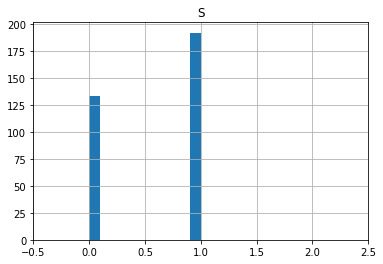

In [3]:
data['S'].value_counts()
#class distribution
data.hist(column = 'S')
plt.xlim(-0.5,2.5)

In [4]:
# créer la matrice de données
X = data.iloc[:,0:12].values

# créer le vecteur d'étiquettes
y = data.iloc[:,13].values 

## CrossValidation Strategy - Model selection

In [5]:
CV_generator = KFold(n_splits=10, shuffle=True).split(X,y)
#nb folds of cross validation
for (train_idx, test_idx) in CV_generator:
    print("train_size:",len(train_idx),"some-train-indexes:", train_idx[:10]) 
    print("train_size:",len(test_idx), "some-test-indexes:", test_idx[:10]) 
    input()

train_size: 292 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 33 some-test-indexes: [ 29  39  44  46  50  58  64  79 104 105]

train_size: 292 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 33 some-test-indexes: [16 21 26 28 40 53 62 90 92 93]

train_size: 292 some-train-indexes: [ 0  1  2  3  4  5  6  7  9 11]
train_size: 33 some-test-indexes: [ 8 10 14 18 47 51 56 68 77 89]

train_size: 292 some-train-indexes: [ 0  1  2  4  5  6  8  9 10 11]
train_size: 33 some-test-indexes: [ 3  7 19 33 36 49 57 70 84 87]

train_size: 292 some-train-indexes: [0 1 2 3 4 5 6 7 8 9]
train_size: 33 some-test-indexes: [12 37 38 45 54 55 59 60 61 65]

train_size: 293 some-train-indexes: [ 0  1  2  3  4  6  7  8  9 10]
train_size: 32 some-test-indexes: [  5  24  32  34  42  67  72  99 106 112]

train_size: 293 some-train-indexes: [ 2  3  4  5  6  7  8  9 10 12]
train_size: 32 some-test-indexes: [ 0  1 11 30 31 35 66 69 76 80]

train_size: 293 some-train-indexes: [ 0  1  3  4  5  6  7  8  9 1

In [6]:
kfold=10

##### 1- Decision Tree

In [7]:
from sklearn import neighbors, metrics, model_selection
#Nous découpons nos données en un jeu d'entrainement et un jeu de test

from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'max_depth':[4, 5, 6, 7, 8, 9, 10]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
dtc = model_selection.GridSearchCV(
    tree.DecisionTreeClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
dtc.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(dtc.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        dtc.cv_results_['mean_test_score'], # score moyen
        dtc.cv_results_['std_test_score'],  # écart-type du score
        dtc.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'max_depth': 10}
Résultats de la validation croisée :
accuracy = 0.885 (+/-0.117) for {'max_depth': 4}
accuracy = 0.881 (+/-0.110) for {'max_depth': 5}
accuracy = 0.896 (+/-0.099) for {'max_depth': 6}
accuracy = 0.892 (+/-0.118) for {'max_depth': 7}
accuracy = 0.888 (+/-0.113) for {'max_depth': 8}
accuracy = 0.881 (+/-0.123) for {'max_depth': 9}
accuracy = 0.900 (+/-0.104) for {'max_depth': 10}


In [8]:
dtc = tree.DecisionTreeClassifier(max_depth=5)
scores = cross_val_score(dtc, X, y, cv=kfold)
print(" dtc Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

 dtc Accuracy: 0.90 (+/- 0.06)


##### 2- Random Forest 

In [9]:
from sklearn import neighbors, metrics, model_selection
#Nous découpons nos données en un jeu d'entrainement et un jeu de test

from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.2)
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':[50, 100, 150, 200, 250, 300, 350]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
rfc = model_selection.GridSearchCV(
    RandomForestClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
rfc.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(rfc.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        rfc.cv_results_['mean_test_score'], # score moyen
        rfc.cv_results_['std_test_score'],  # écart-type du score
        rfc.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_estimators': 50}
Résultats de la validation croisée :
accuracy = 0.935 (+/-0.062) for {'n_estimators': 50}
accuracy = 0.931 (+/-0.079) for {'n_estimators': 100}
accuracy = 0.931 (+/-0.062) for {'n_estimators': 150}
accuracy = 0.931 (+/-0.079) for {'n_estimators': 200}
accuracy = 0.919 (+/-0.095) for {'n_estimators': 250}
accuracy = 0.923 (+/-0.081) for {'n_estimators': 300}
accuracy = 0.931 (+/-0.083) for {'n_estimators': 350}


In [11]:
rfc = RandomForestClassifier(n_estimators=100) # n_estimators=?, max_features=?
scores = cross_val_score(rfc, X, y, cv=kfold)
print(" rfc Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

 rfc Accuracy: 0.94 (+/- 0.08)


##### 3- Linear SVC

In [12]:
from sklearn import svm
lsvc = svm.SVC(kernel='linear')
scores = cross_val_score(lsvc, X, y, cv=kfold)
print("lsvc accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

lsvc accuracy: 0.92 (+/- 0.07)


##### 4- KNN

In [13]:
from sklearn import neighbors, metrics, model_selection
#Nous découpons nos données en un jeu d'entrainement et un jeu de test

from sklearn import model_selection
X_train, X_test, y_train, y_test = \
    model_selection.train_test_split(X, y, test_size=0.1)
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'n_neighbors': 13}
Résultats de la validation croisée :
accuracy = 0.897 (+/-0.083) for {'n_neighbors': 3}
accuracy = 0.884 (+/-0.070) for {'n_neighbors': 5}
accuracy = 0.887 (+/-0.063) for {'n_neighbors': 7}
accuracy = 0.901 (+/-0.054) for {'n_neighbors': 9}
accuracy = 0.894 (+/-0.058) for {'n_neighbors': 11}
accuracy = 0.918 (+/-0.039) for {'n_neighbors': 13}
accuracy = 0.901 (+/-0.046) for {'n_neighbors': 15}


In [14]:
knn = neighbors.KNeighborsClassifier(n_neighbors=9)
scores = cross_val_score(knn, X, y, cv=kfold)
print("knn accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

knn accuracy: 0.91 (+/- 0.11)


##### 5- Logistic Regression

In [15]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

lr = LogisticRegression(solver = 'liblinear')

In [16]:
scores = cross_val_score(lr, X, y, cv=kfold)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.13)


## TrainTest Strategy - Model evaluation

### Split TrainTest

In [65]:
import sklearn.utils
data = sklearn.utils.shuffle(data)
data['is_train'] = np.random.uniform(0, 1, len(data)) <= 3/4 #.75
train, test = data[data['is_train']==True], data[data['is_train']==False]
print("size train/test: {0}/{1}".format(train.shape[0], test.shape[0]))
X_train, y_train = train[names[:-1]], train['S']
X_test, y_test = test[names[:-1]], test['S']

size train/test: 254/71


### Performance evaluation

In [66]:
from sklearn import metrics

In [67]:
clf_map = {'DecisionTree': dtc,'RandomForest': rfc, 'LinearSVC': lsvc, 'KNN': knn, 'LogisticRegression':lr }
clf_preds_map = {}
for cname, clf in clf_map.items():
    clf.fit(X_train, y_train)
    clf_preds_map[cname] = clf.predict(X_test)

##### Accuracy

In [68]:
for cname, _ in clf_map.items():
    print("=> {0} accuracy = [{1:.2f}]]".format(cname, metrics.accuracy_score(y_test,clf_preds_map[cname])))

=> DecisionTree accuracy = [0.97]]
=> RandomForest accuracy = [0.99]]
=> LinearSVC accuracy = [0.97]]
=> KNN accuracy = [0.92]]
=> LogisticRegression accuracy = [0.90]]


##### Recall

In [69]:
for cname, _ in clf_map.items():
    print("=> {0} recall = [{1:.2f}]]".format(cname, metrics.recall_score(y_test,clf_preds_map[cname])))

=> DecisionTree recall = [0.96]]
=> RandomForest recall = [0.98]]
=> LinearSVC recall = [0.98]]
=> KNN recall = [0.87]]
=> LogisticRegression recall = [0.96]]


##### f1_score

In [70]:
for cname, _ in clf_map.items():
    print("=> {0} f1_score = [{1:.2f}]]".format(cname, metrics.f1_score(y_test,clf_preds_map[cname])))

=> DecisionTree f1_score = [0.98]]
=> RandomForest f1_score = [0.99]]
=> LinearSVC f1_score = [0.98]]
=> KNN f1_score = [0.93]]
=> LogisticRegression f1_score = [0.92]]


##### Confusion matrix

In [71]:
conf_map = {}
for cname, _ in clf_map.items():
    conf_map[cname]=metrics.confusion_matrix(y_test, clf_preds_map[cname])

Confusion Matrix of the 5 Classifiers


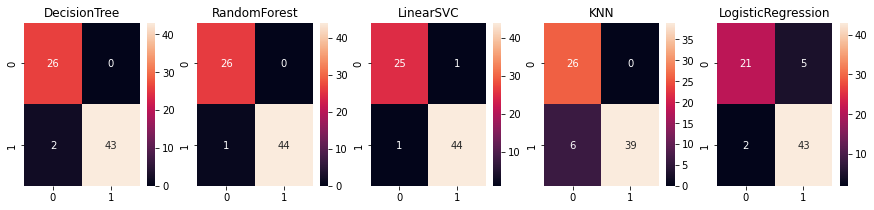

In [72]:
import seaborn as sns
plt.figure(figsize=(15, 3))
print('Confusion Matrix of the 5 Classifiers')
nb_cls = len(clf_map)
plt.subplot(1, nb_cls, 1) # starts from 1
for i, cname in enumerate(conf_map):
    plt.subplot(1, nb_cls, i+1)
    plt.title(cname);
    sns.heatmap(conf_map[cname], annot=True,  fmt='')